In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
img = cv.imread('./imagenes/semillas2.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)



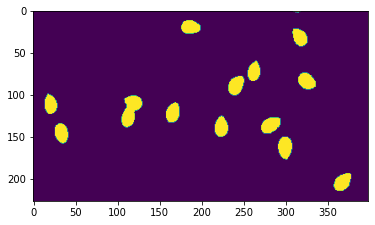

In [9]:
plt.imshow(thresh)
plt.show()

In [10]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

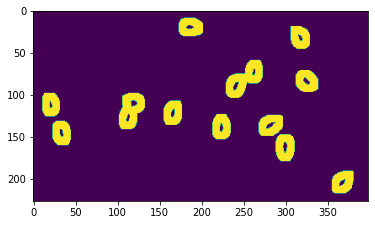

In [15]:
plt.imshow(unknown)
plt.show()

In [16]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

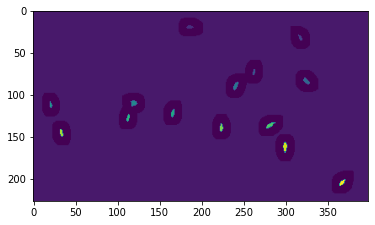

In [17]:
plt.imshow(markers)
plt.show()

In [23]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,255,0]

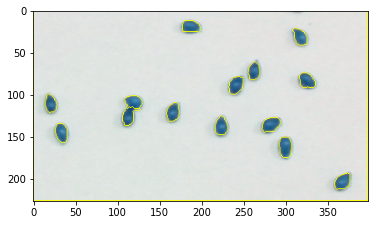

In [24]:
plt.imshow(img)
plt.show()